# Exercise 7-1 

Using data from the NSFG, make a scattter plot of birth weight versus mother's age. Plot percentiles of birth weight versus mother's age. Compute Pearson's and Spearman's correlations.

How would you characterize the relationship between these variables?

In [11]:
# import required libraries and files

from __future__ import print_function

import sys
import numpy as np
import math

import first
import thinkplot
import thinkstats2
import nsfg

In [13]:
# Make dataframes
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [20]:
# Solution to: Compute Pearson's and Spearman's Correlations.

import pandas as pd

# Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# Pearson's Correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# Spearman's Rank Correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

# Spearman's Correlation
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')


# Create the variables ages & weights from the df, as well as print the variables Pearson's & Spearman's Correlation
ages = live.agepreg
weights = live.totalwgt_lb
print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))

Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


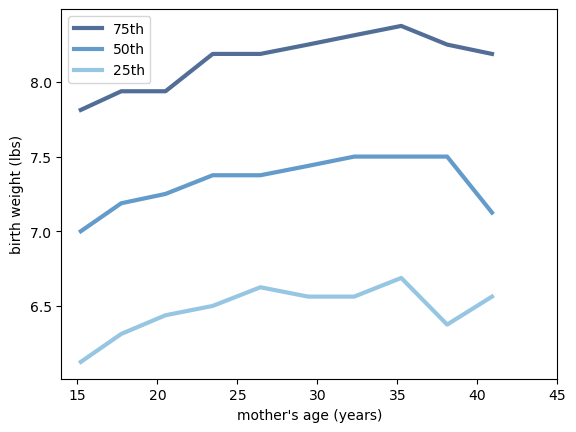

In [29]:
# Method function for binned percentiles
def BinnedPercentiles(df):
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="mother's age (years)",
                     ylabel='birth weight (lbs)',
                     xlim=[14, 45], legend=True)

BinnedPercentiles(live)

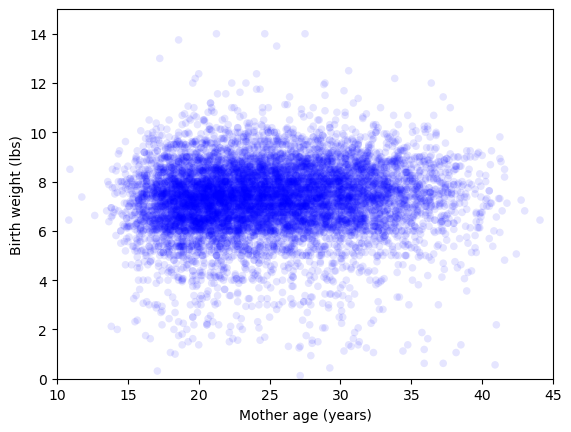

In [30]:
# ScatterPlot function for birth weight and mother's age.
def ScatterPlot(ages, weights, alpha=1.0):
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Mother age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

ScatterPlot(ages, weights, alpha=0.1)

I would characterize the relationships between Age and Birth Weight as a weak relationship. The scatter plot shows a slight positive relationship, but it is very weak.

Both of the correlation metrics are between 0 and 0.1, which supports what we see in the scatter plot.

# Exercise 8-1

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [33]:
import random


# Function to calculate the mean error
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

# Function for estimation
def Estimate4(n=7, iters=100000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate4()

Experiment 1
mean error xbar -0.002164464116739412
mean error median -0.002297612371785478


In [35]:
# Function to calculate the root mean square error
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

# Second function for estimation
def Estimate5(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.5153770567195919
RMSE unbiased 0.5778177044695564


# Excercise 8-2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.


About 66% of the population makes less than the mean. The assumed upper bound can influence the percentage of households reporting taxable incomes below the mean, with a higher upper bound increasing it and a lower upper bound decreasing it. However, in a normal distribution with no upper bound, the percentage would stay around 66%.

standard error 0.8967179115445979
confidence interval (1.2901330772324622, 3.869233489242792)


0.8967179115445979

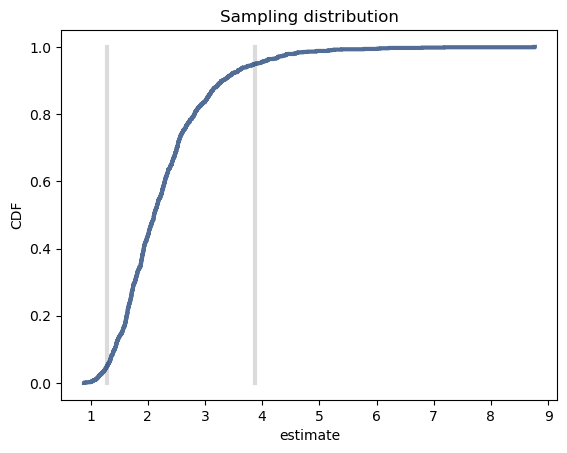

In [36]:
# Function for simulation

def SimulateSample(lam=2, n=10, iters=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()